This notebook is for exploring different inputs for supervised machine learning models. 

In [2]:
# Import necessary packages
import os
import pickle
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rasterio as rio
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import earthpy as et
import earthpy.spatial as es

In [3]:
# For windows users
os.environ["PROJ_LIB"] = r"C:\Users\katy\Anaconda3\envs\earth-analytics-python\Library\share"

In [137]:
# Define area of interest and paths
aoi = 'koumassi_focus_ps'
koumassi_band_path = '..\\data\\'+aoi+"\\"
koumassi_raster_outputs_path = os.path.join(koumassi_band_path, "outputs\\raster_files\\")
koumassi_svm_outputs_path = os.path.join(koumassi_band_path, "outputs\\svm\\")

aoi2 = 'southeast_ps'
southeast_band_path = '..\\data\\'+aoi2+"\\"
southeast_raster_outputs_path = os.path.join(southeast_band_path, "outputs\\raster_files\\")
southeast_svm_outputs_path = os.path.join(southeast_band_path, "outputs\\svm\\")
combined_svm_outputs_path = '..\\data\\combined\\'

# Select all raw values needed for model development
koumassi_raw_list = glob(koumassi_raster_outputs_path+"\\"+"*raw*")
koumassi_raw_list.sort()
southeast_raw_list = glob(southeast_raster_outputs_path+"\\"+"*raw*")
southeast_raw_list.sort()

In [156]:
aoi_clf = 'southeast_ps'
band_path_clf = '..\\data\\'+aoi_clf+"\\"
svm_outputs_path_clf = os.path.join(band_path_clf, "outputs\\svm\\")
southeast_svm_clf = pickle.load(open(svm_outputs_path_clf+'pickle_svm_424', 'rb'))

In [141]:
# Get meta data for writing out SVM result
koumassi_all_bands_path = os.path.join(koumassi_raster_outputs_path + aoi+"_all_bands.tif")
with rio.open(koumassi_all_bands_path) as src:
    koumassi_all_bands_stack = src.read()
    stack_meta = src.meta
    koumassi_files_out_meta = src.meta.copy()
koumassi_files_out_meta['count']=1


# Get meta data for writing out SVM result
southeast_all_bands_path = os.path.join(southeast_raster_outputs_path + aoi2+"_all_bands.tif")
with rio.open(southeast_all_bands_path) as src:
    southeast_all_bands_stack = src.read()
    stack_meta = src.meta
    southeast_files_out_meta = src.meta.copy()
southeast_files_out_meta['count']=1

In [5]:
# # Sample index values at reference points for 60perc data set

# # Create tuples of all x coordinates and y coordinates 
# x_coords = tuple(sample_pts.geometry.x)
# y_coords = tuple(sample_pts.geometry.y)

# i = 0
# index_list = []
# filename=[]

# for raw in raw_list:
#     sampled_values = []
    
#     # Sample raster at each combo of x and y coordinates
#     with rio.open(raw) as src:
#         for val in src.sample(zip(x_coords, y_coords)):
#             i = i+1
#         # Note that each val is an individual numpy array
#         # print(val.shape)
#             sampled_values.append(val)
#         arr = np.array([sampled_values]).squeeze()
#         index_list.append([arr])
#         filename.append(raw[51:71])
        
# labels = filename
# index_df = pd.DataFrame(np.concatenate(index_list))
# index_df = index_df.transpose()
# index_df.columns=labels

# # Write out index values for reference points as CSV
# filepath = validation_data_path+"raw_index_values_424.csv"
# index_df.to_csv(filepath) 

In [49]:
# Create dataframe with  validation classes and index values
# Validation data CSV created using ArcGIS
koumassi_ref_data = pd.read_csv(koumassi_svm_outputs_path+"reference_data_koumassi.csv")
southeast_ref_data = pd.read_csv(southeast_svm_outputs_path+"reference_data_southeast.csv")

koumassi_ref_data = koumassi_ref_data.drop(columns="Unnamed: 0")
southeast_ref_data = southeast_ref_data.drop(columns="Unnamed: 0")
southeast_ref_data.head()

# concat_list = [koumassi_ref_data,southeast_ref_data]
train_data = koumassi_ref_data.append(southeast_ref_data)

train_data.head()

ClassValue  dark.tif   mbi.tif   msi.tif  ndvi.tif  ndwi_coastal.tif  \
0           2    0.1846  0.001091  0.111064 -0.011570         -0.000799   
1           2    0.1706  0.005009  0.094227 -0.029991          0.092105   
2           1    0.1630  0.000000  0.131636  0.006560         -0.106168   
3           1    0.1616  0.002909  0.142139 -0.008547         -0.044550   
4           1    0.1916  0.000000  0.182211  0.021898         -0.168335   

   ndwi_coastal_msi.tif  ndwi_yellow.tif  ndwi_yellow_msi.tif  
0             -0.111863         0.000000            -0.111064  
1             -0.002122         0.043328            -0.050900  
2             -0.237804        -0.013902            -0.145538  
3             -0.186688        -0.024164            -0.166302  
4             -0.350546        -0.039676            -0.221887

In [54]:
# Define training dataset
XX =train_data.iloc[:,[1,2,3,4,5,6,7,8]]
X = train_data.iloc[:,[1,2,3,4,5,6,7,8]].values
y = train_data.iloc[:,0].values

# pd.DataFrame(X).to_csv(svm_outputs_path+"X_koumassi.csv")
# pd.DataFrame(y).to_csv(svm_outputs_path+"y_koumassi.csv")
XX.head()


array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

In [ ]:
# Split reference dataset, hold back 40% for external validation, 60% for internal train/test
# Xint, Xext, yint, yext = train_test_split(X, y, test_size=0.4)

In [158]:
pd.DataFrame(Xext).to_csv(combined_svm_outputs_path+"Xext.csv")
pd.DataFrame(yext).to_csv(combined_svm_outputs_path+"yext.csv")

In [89]:
# Split training dataset, test size is 40%, training size 60%
Xtrain, Xtest, ytrain, ytest = train_test_split(Xint, yint, test_size=0.4)

In [90]:
# Define SVC classifier with linear kernel. Run cells 8 and 9 until happy with accuracy score.
clf = SVC(kernel='linear')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
accuracy_score(ytest, ypred)

0.9378531073446328

In [66]:
# Save out SVM classifier with highest accuracy score. 

# Final SVM model saved with accuracy score of 0.9529190207156308
# new3 for koumassic plus new for southeast
# Includes dark.tif 	mbi.tif 	msi.tif 	ndvi.tif 	ndwi_coastal.tif 	ndwi_coastal_msi.tif 	ndwi_yellow.tif 	ndwi_yellow_msi.tif
pickle.dump(clf, open(combined_svm_outputs_path+'pickle_combined_svm_424', 'wb'))



In [67]:
# Define SVM classifier with rbf kernel
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(Xtrain, ytrain)
ypred_rbf = clf_rbf.predict(Xtest)
accuracy_score(ytest, ypred_rbf)

C:\Users\katy\Anaconda3\envs\earth-analytics-python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9303201506591338

In [68]:
 # Save out SVM classifier with rbf kernel, accuracy score of 0.9303201506591338
pickle.dump(clf_rbf, open(combined_svm_outputs_path+'pickle_combined_svm_rbf_424', 'wb'))

[[108   4   0   0]
 [  8 110   1   3]
 [  0   0  31   0]
 [  0   5   0  57]]


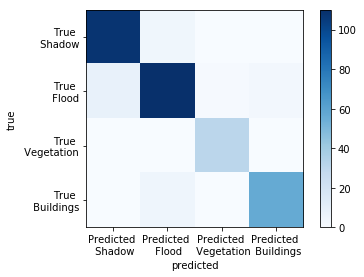

In [75]:
#Print confusion matrix for linear kernel SVM
print(confusion_matrix(ytest, ypred))
plt.imshow(confusion_matrix(ytest, ypred),
           cmap='Blues', interpolation='nearest')
plt.xticks(np.arange(4), ('Predicted \n Shadow','Predicted \n Flood','Predicted \n Vegetation', 'Predicted \n Buildings'))
plt.yticks(np.arange(4), ('True \n Shadow','True \n Flood','True \n Vegetation', 'True \n Buildings'))
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

In [ ]:
#Print confusion matrix for rbf kernel SVM
print(confusion_matrix(ytest, ypred_rbf))
plt.imshow(confusion_matrix(ytest, ypred_rbf),
           cmap='Blues', interpolation='nearest')
plt.xticks(np.arange(4), ('Predicted \n Shadow','Predicted \n Flood','Predicted \n Vegetation', 'Predicted \n Buildings'))
plt.yticks(np.arange(4), ('True \n Shadow','True \n Flood','True \n Vegetation', 'True \n Buildings'))
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

# Validation with 40% of data held back from SVM model development

In [ ]:
# # Create tuples of all x coordinates and y coordinates 
# x_valid_coords = tuple(sample_pts_40perc.geometry.x)
# y_valid_coords = tuple(sample_pts_40perc.geometry.y)

# i = 0
# index_valid_list = []
# filename=[]

# for raw in raw_list:
#     sampled_values = []
    
#     # Sample raster at each combo of x and y coordinates
#     with rio.open(raw) as src:
#         for val in src.sample(zip(x_valid_coords, y_valid_coords)):
#             i = i+1
#         # Note that each val is an individual numpy array
#         # print(val.shape)
#             sampled_values.append(val)
#         arr = np.array([sampled_values]).squeeze()
#         index_valid_list.append([arr])
#         filename.append(raw[50:78])
        

# labels = filename
# index_valid_df = pd.DataFrame(np.concatenate(index_valid_list))
# index_valid_df = index_valid_df.transpose()
# index_valid_df.columns=labels
# filepath = validation_data_path+"raw_index_values_40perc.csv"
# index_valid_df.to_csv(filepath) 

In [ ]:
# # Create dataframe with  validation classes and index values
# # Validation data CSV created using ArcGIS
# valid_40_data = pd.read_csv(validation_data_path+"koumassi_validation_data_40_percent.csv")
# external_valid_df = pd.concat([valid_40_data,index_valid_df], axis=1, sort=False)

In [ ]:
# # Define external validation dataset
# XXvalid = external_valid_df.iloc[:,[2,3,4,5,6,8,9]]
# Xvalid = external_valid_df.iloc[:,[2,3,4,5,6,8,9]].values
# yvalid = external_valid_df.iloc[:,1].values
# XXvalid.head()

In [92]:
# Load saved SVM classifer
# loaded_clf = pickle.load(open(svm_outputs_path+'pickle_svm_final_with_ndvi_ndwi_yellow', 'rb'))
loaded_clf = pickle.load(open(combined_svm_outputs_path+'pickle_combined_svm_424', 'rb'))

# Apply linear kernel SVM classifier to external dataset
ypred_valid = clf.predict(Xext)
accuracy_score(yext, ypred_valid)

0.9525423728813559

[[275   7   0   0]
 [ 16 259   2   3]
 [  0   0 116   0]
 [  0  14   0 193]]


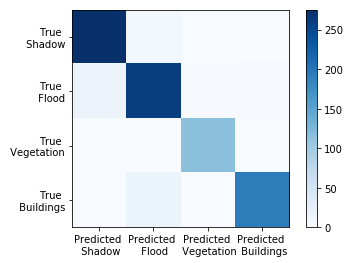

In [93]:
#Print confusion matrix for linear kernel SVM
print(confusion_matrix(yext, ypred_valid))

plt.imshow(confusion_matrix(yext, ypred_valid),
           cmap='Blues', interpolation='nearest')
plt.xticks(np.arange(4), ('Predicted \n Shadow','Predicted \n Flood','Predicted \n Vegetation', 'Predicted \n Buildings'))
plt.yticks(np.arange(4), ('True \n Shadow','True \n Flood','True \n Vegetation', 'True \n Buildings'))
plt.colorbar()
plt.grid(False)


In [95]:
# Write out confusion matrix array
confusion_svm_external = confusion_matrix(yext, ypred_valid)
pd.DataFrame(confusion_svm_external).to_csv(combined_svm_outputs_path+'confusion_svm_external_424.csv')

In [98]:
# Load saved SVM classifer with rbf kernel
loaded_clf_rbf = pickle.load(open(combined_svm_outputs_path+'pickle_combined_svm_rbf_424', 'rb'))
# Apply rbf kernel SVM classifier to external dataset
ypred_rbf_valid = loaded_clf_rbf.predict(Xext)
accuracy_score(yext, ypred_rbf_valid)

0.9367231638418079

[[278   4   0   0]
 [ 28 242   3   7]
 [  0   0 116   0]
 [  0  14   0 193]]


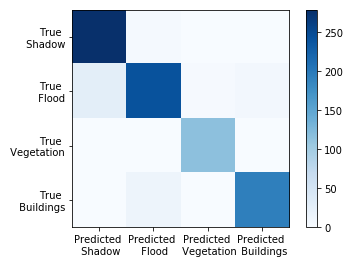

In [99]:
#Print confusion matrix for rbf kernel SVM
print(confusion_matrix(yext, ypred_rbf_valid))

plt.imshow(confusion_matrix(yext, ypred_rbf_valid),
           cmap='Blues', interpolation='nearest')
plt.xticks(np.arange(4), ('Predicted \n Shadow','Predicted \n Flood','Predicted \n Vegetation', 'Predicted \n Buildings'))
plt.yticks(np.arange(4), ('True \n Shadow','True \n Flood','True \n Vegetation', 'True \n Buildings'))
plt.colorbar()
plt.grid(False)


# Developing map based on trained SVM model with linear kernel

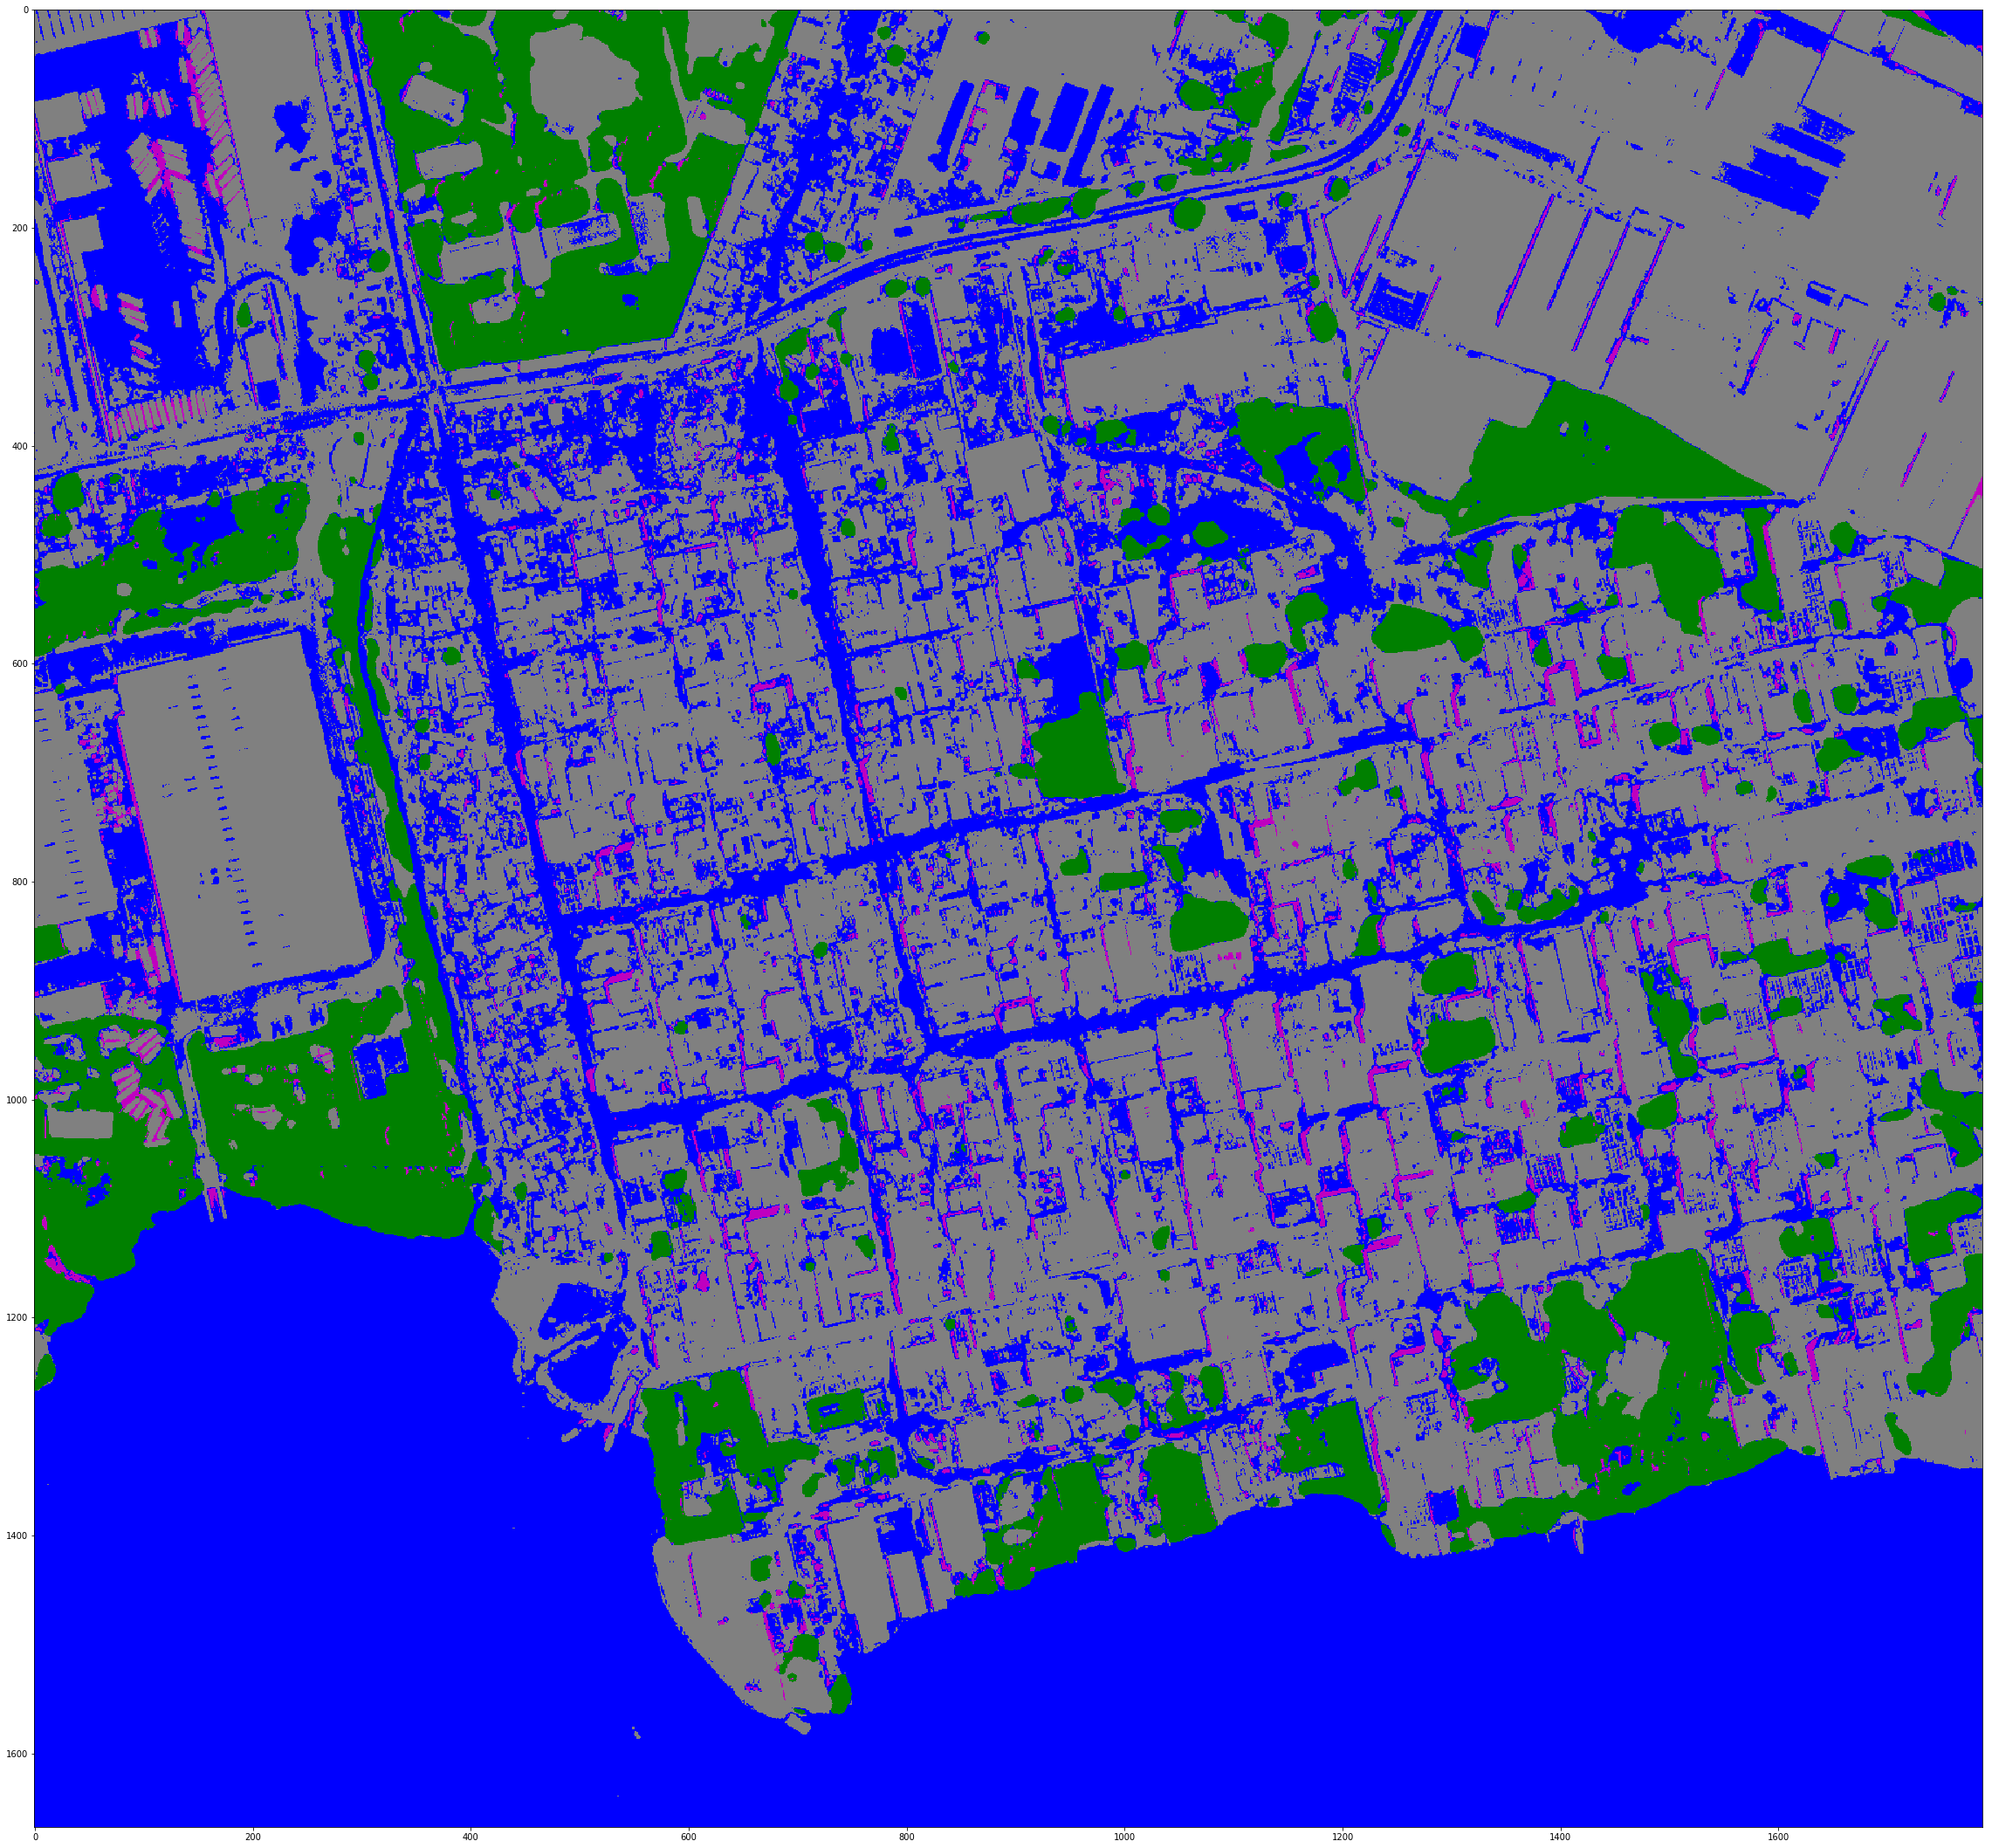

In [147]:
# Create stack of inputs for entire image and apply saved linear SVM classifer
koumassi_index_stack, k_meta = es.stack(koumassi_raw_list)
koumassi_index_im = np.rollaxis(koumassi_index_stack, 0, 3)
X_koumassi_index = koumassi_index_im.reshape(-1,8) #Update based on number of model params
predictedClass = loaded_clf.predict(X_koumassi_index)

# Plot SVM map
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(figsize = (40,40))
pred_data = predictedClass.reshape(koumassi_index_im.shape[:2])
cmap = ListedColormap(['m','blue','green','grey'])
ax.imshow(pred_data,cmap=cmap)
plt.show()

In [148]:
# Write out SVM map
with rio.open(combined_svm_outputs_path+'koumassi_SVM_map_combined_424.tif', 'w', **koumassi_files_out_meta) as dst:
    dst.write(pred_data.astype('float32'),1)

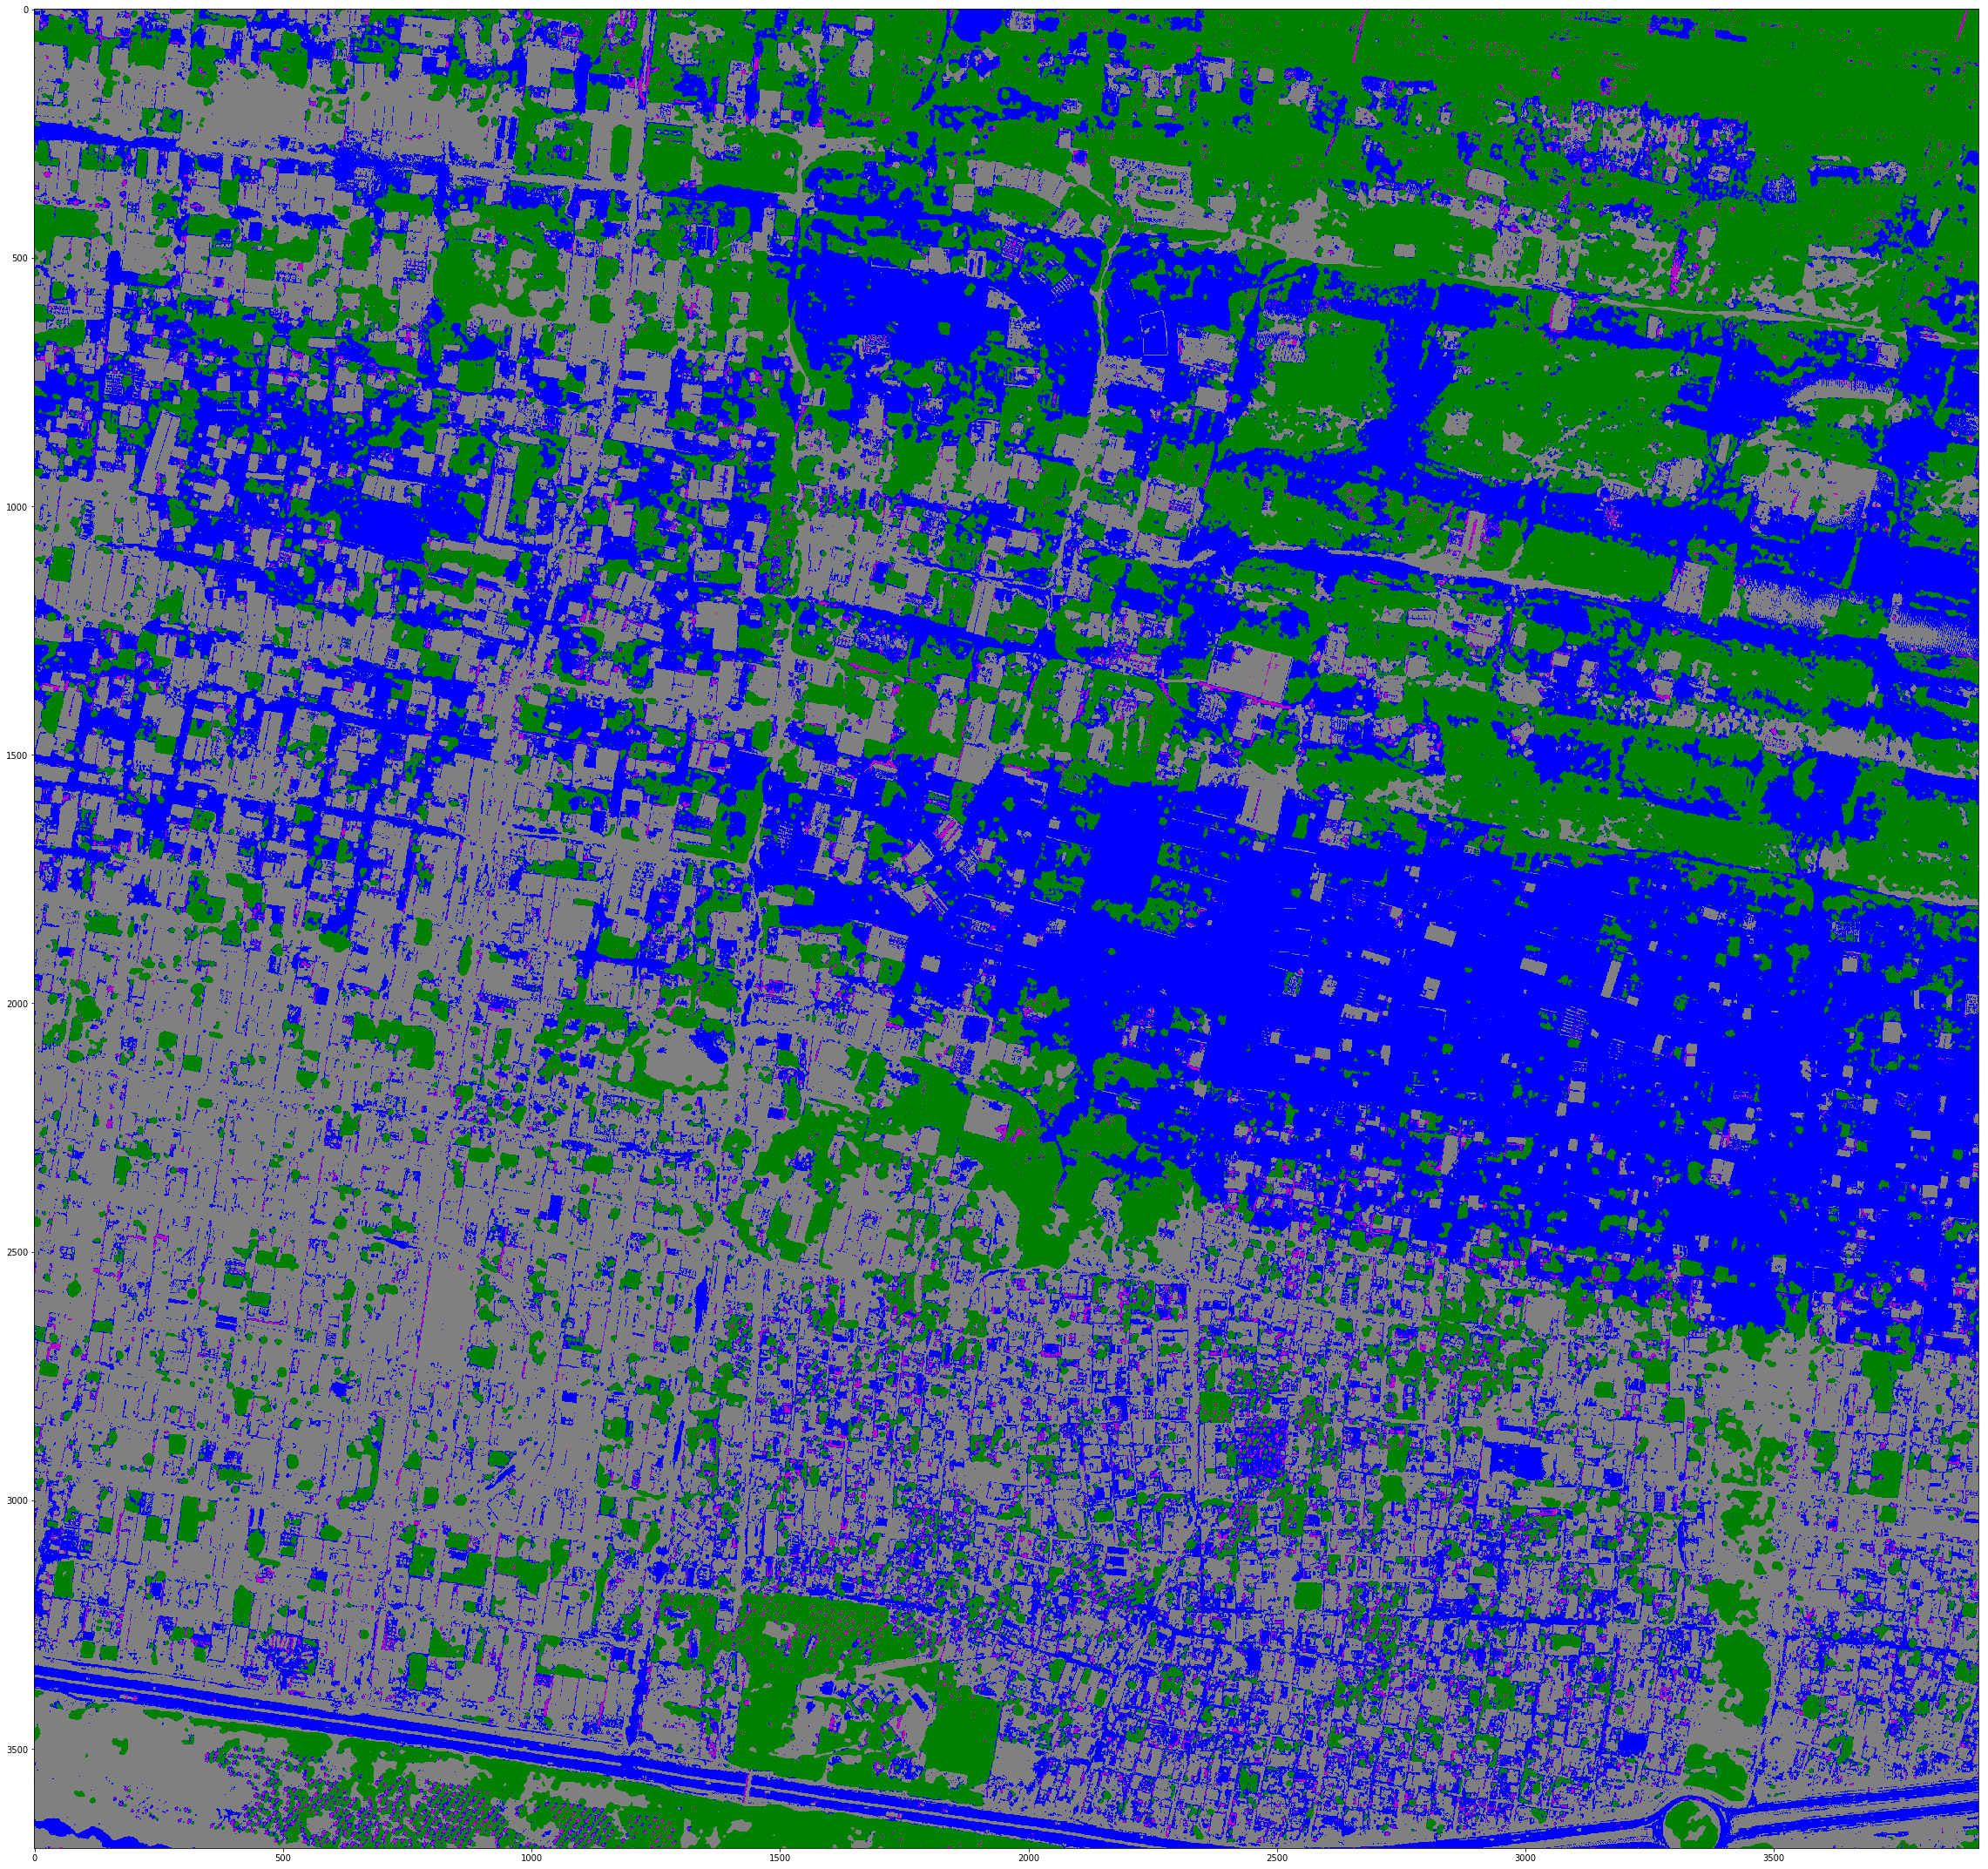

In [149]:
# Create stack of inputs for entire image and apply saved linear SVM classifer
southeast_index_stack, se_meta = es.stack(southeast_raw_list)
southeast_index_im = np.rollaxis(southeast_index_stack, 0, 3)
X_southeast_index = southeast_index_im.reshape(-1,8) #Update based on number of model params
predictedClass = loaded_clf.predict(X_southeast_index)

# Plot SVM map
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(figsize = (40,40))
pred_data = predictedClass.reshape(southeast_index_im.shape[:2])
cmap = ListedColormap(['m','blue','green','grey'])
ax.imshow(pred_data,cmap=cmap)
plt.show()

In [150]:
# Write out SVM map
with rio.open(combined_svm_outputs_path+'southeast_SVM_map_combined_424.tif', 'w', **southeast_files_out_meta) as dst:
    dst.write(pred_data.astype('float32'),1)

# Random forest

In [100]:
# Define random forest classifier
clf_random_forest = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=10)

In [129]:
# Split training dataset, test size is 40%, training size 60%
Xtrain_rf, Xtest_rf, ytrain_rf, ytest_rf = train_test_split(Xint, yint, test_size=0.4)

In [130]:
# Apply random forest classifier
clf_random_forest.fit(Xtrain_rf, ytrain_rf)
ypred_random_forest = clf_random_forest.predict(Xtest_rf)
accuracy_score(ytest_rf, ypred_random_forest)

0.911487758945386

In [111]:
# Save out random forest classfier with accuracy score of 0.9227871939736346
pickle.dump(clf_random_forest, open(combined_svm_outputs_path+'pickle_combined_RF_424', 'wb'))

# Save out random forest classfier with accuracy score of 0.9462809917355371
# pickle.dump(clf_random_forest, open(svm_outputs_path+'pickle_RF_final_with_ndvi', 'wb'))

# Save out random forest classfier with accuracy score of 0.946281
# pickle.dump(clf_random_forest, open(svm_outputs_path+'pickle_RF_final', 'wb'))

# picked 0.9545 accuracy score
# pickled 0.929752 model with better confusion matrix as "best" model confusion matrix did not look good

# pickled 0.9421487603305785 model with better confusion matrix 
# pickle.dump(clf_random_forest, open(svm_outputs_path+'pickle_random_forest_updated', 'wb'))

In [ ]:
#Print confusion matrix for linear kernel SVM
print(confusion_matrix(ytest_rf, ypred_random_forest))
plt.imshow(confusion_matrix(ytest_rf, ypred_random_forest),
           cmap='Blues', interpolation='nearest')
plt.xticks(np.arange(4), ('Predicted \n Shadow','Predicted \n Flood','Predicted \n Vegetation', 'Predicted \n Buildings'))
plt.yticks(np.arange(4), ('True \n Shadow','True \n Flood','True \n Vegetation', 'True \n Buildings'))
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

# Validation with 40% of data held back from random forest model development

In [132]:
# Load saved random forest classifer
loaded_clf_rf = pickle.load(open(combined_svm_outputs_path+'pickle_combined_RF_424', 'rb'))

In [133]:
# Apply linear kernel random forest classifier to external dataset
ypred_valid_rf = loaded_clf_rf.predict(Xext)
accuracy_score(yext, ypred_valid_rf)

0.9175141242937853

[[271  11   0   0]
 [ 28 229   3  20]
 [  0   0 116   0]
 [  0  11   0 196]]


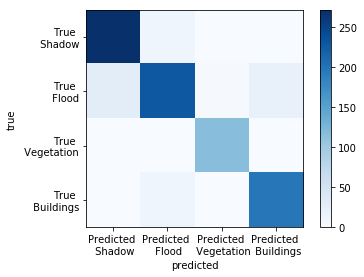

In [134]:
#Print confusion matrix for random forest
print(confusion_matrix(yext, ypred_valid_rf))

plt.imshow(confusion_matrix(yext, ypred_valid_rf),
           cmap='Blues', interpolation='nearest')
plt.xticks(np.arange(4), ('Predicted \n Shadow','Predicted \n Flood','Predicted \n Vegetation', 'Predicted \n Buildings'))
plt.yticks(np.arange(4), ('True \n Shadow','True \n Flood','True \n Vegetation', 'True \n Buildings'))
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

In [135]:
# Write out confusion matrix 
confusion_rf_external = confusion_matrix(yext, ypred_valid)
pd.DataFrame(confusion_rf_external).to_csv(combined_svm_outputs_path+'confusion_rf_external_424.csv')

# Plot random forest

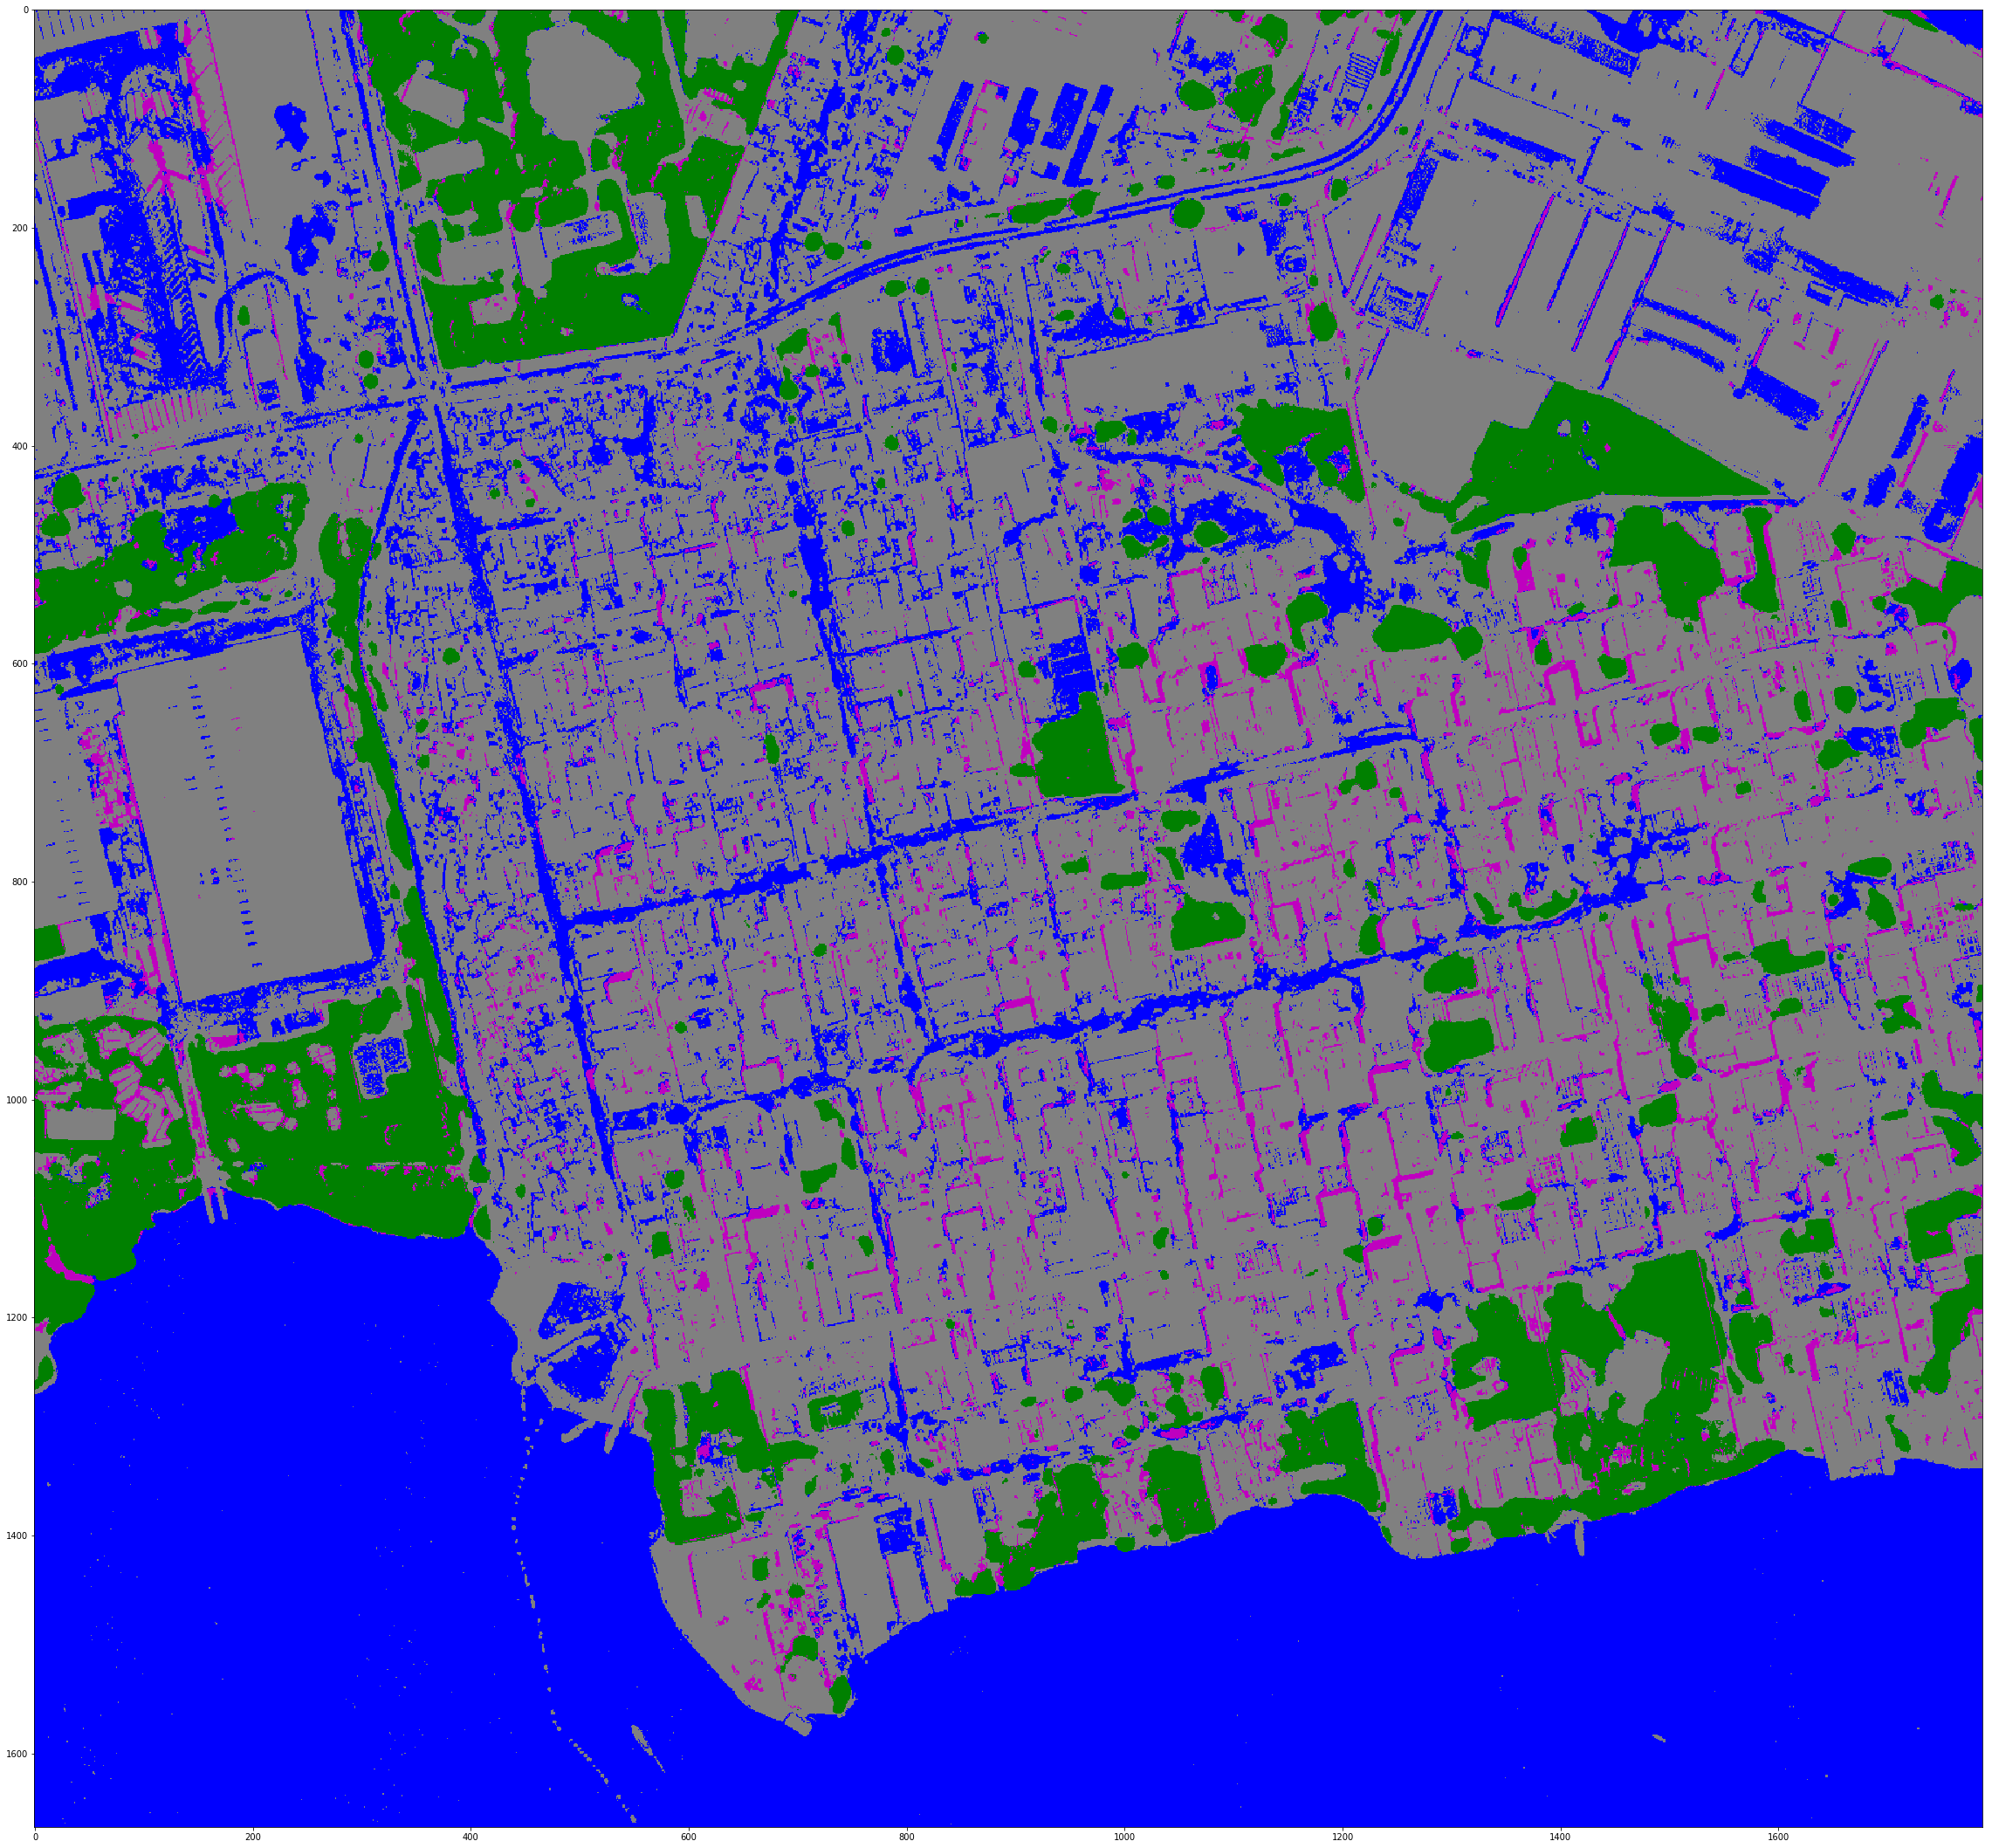

In [151]:
# Create stack of inputs for entire image and apply saved linear SVM classifer
koumassi_index_stack, k_meta = es.stack(koumassi_raw_list)
koumassi_index_im = np.rollaxis(koumassi_index_stack, 0, 3)
X_koumassi_index = koumassi_index_im.reshape(-1,8) #Update based on number of model params
predictedClass = loaded_clf_rf.predict(X_koumassi_index)

# Plot SVM map
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(figsize = (40,40))
pred_data = predictedClass.reshape(koumassi_index_im.shape[:2])
cmap = ListedColormap(['m','blue','green','grey'])
ax.imshow(pred_data,cmap=cmap)
plt.show()

In [152]:
# Write out random forest tif
with rio.open(combined_svm_outputs_path+'koumassi_RF_map_combined_424.tif', 'w', **koumassi_files_out_meta) as dst:
    dst.write(pred_data.astype('float32'),1)

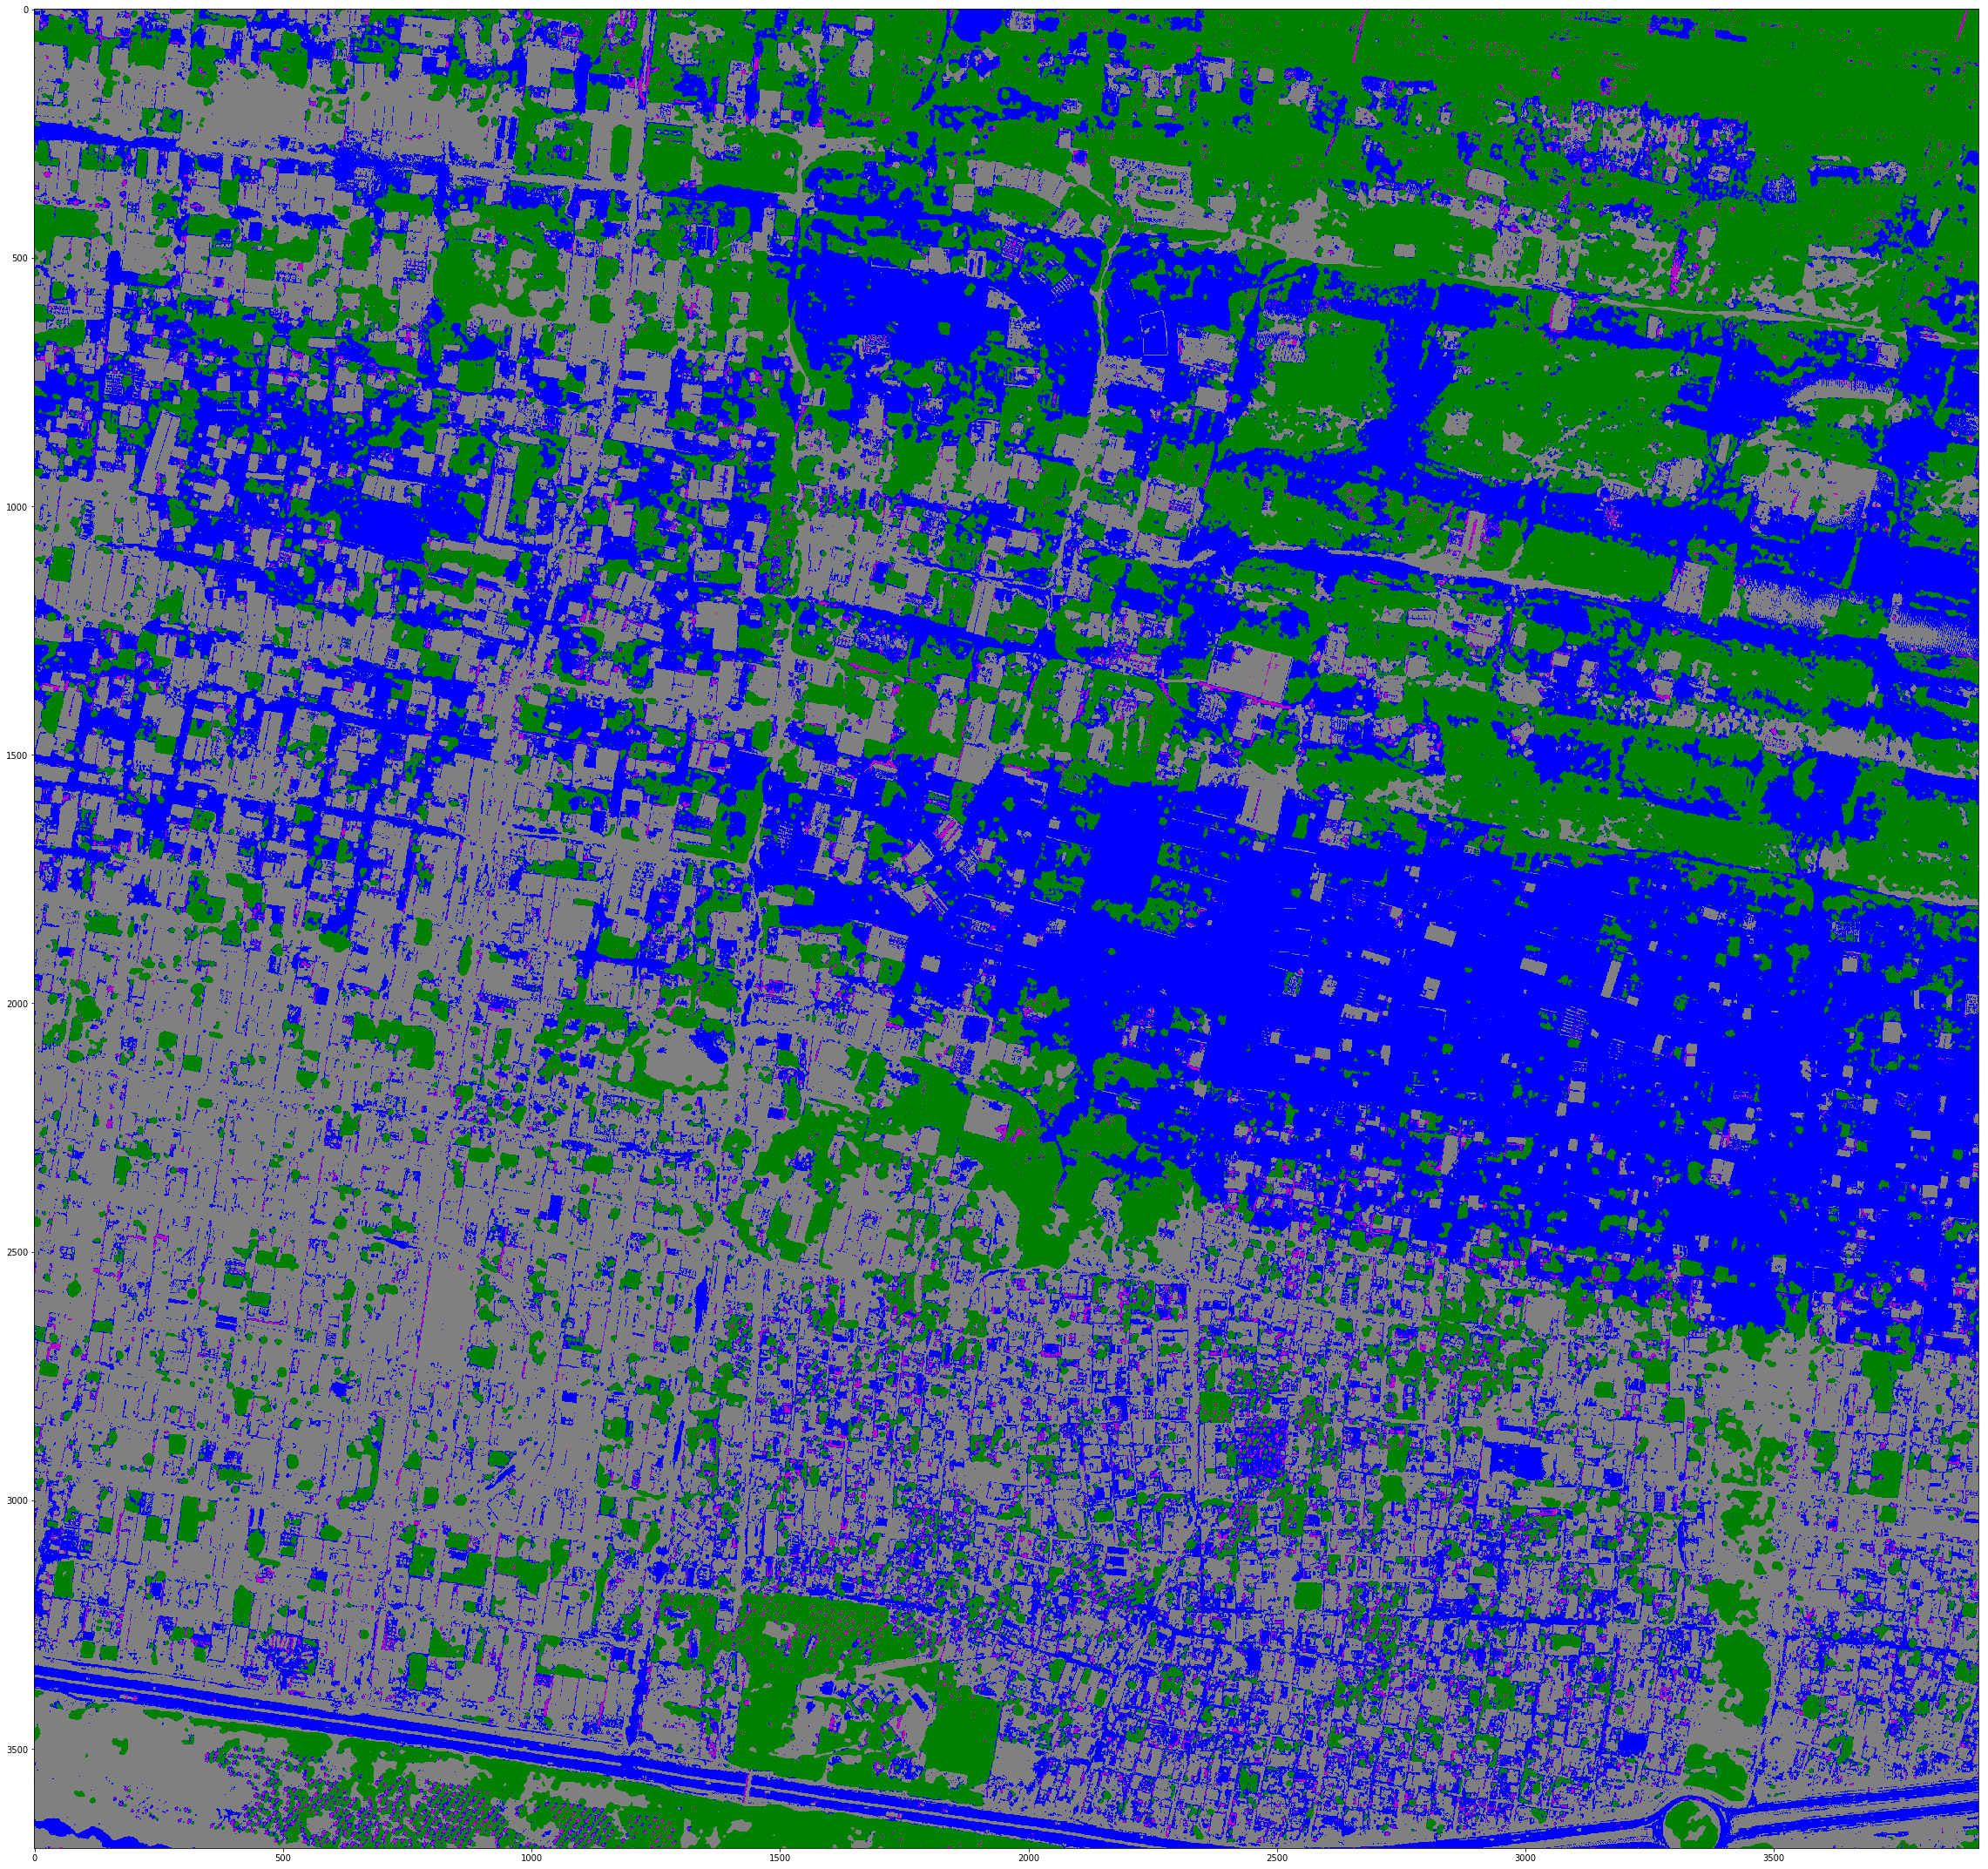

In [153]:
# Create stack of inputs for entire image and apply saved linear SVM classifer
southeast_index_stack, se_meta = es.stack(southeast_raw_list)
southeast_index_im = np.rollaxis(southeast_index_stack, 0, 3)
X_southeast_index = southeast_index_im.reshape(-1,8) #Update based on number of model params
predictedClass = loaded_clf.predict(X_southeast_index)

# Plot SVM map
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(figsize = (40,40))
pred_data = predictedClass.reshape(southeast_index_im.shape[:2])
cmap = ListedColormap(['m','blue','green','grey'])
ax.imshow(pred_data,cmap=cmap)
plt.show()

In [154]:
with rio.open(combined_svm_outputs_path+'southeast_RF_map_combined_424.tif', 'w', **southeast_files_out_meta) as dst:
    dst.write(pred_data.astype('float32'),1)

# Try clf from southeast

In [157]:
ypred = southeast_svm_clf.predict(Xext)
accuracy_score(yext, ypred)

0.9107344632768362

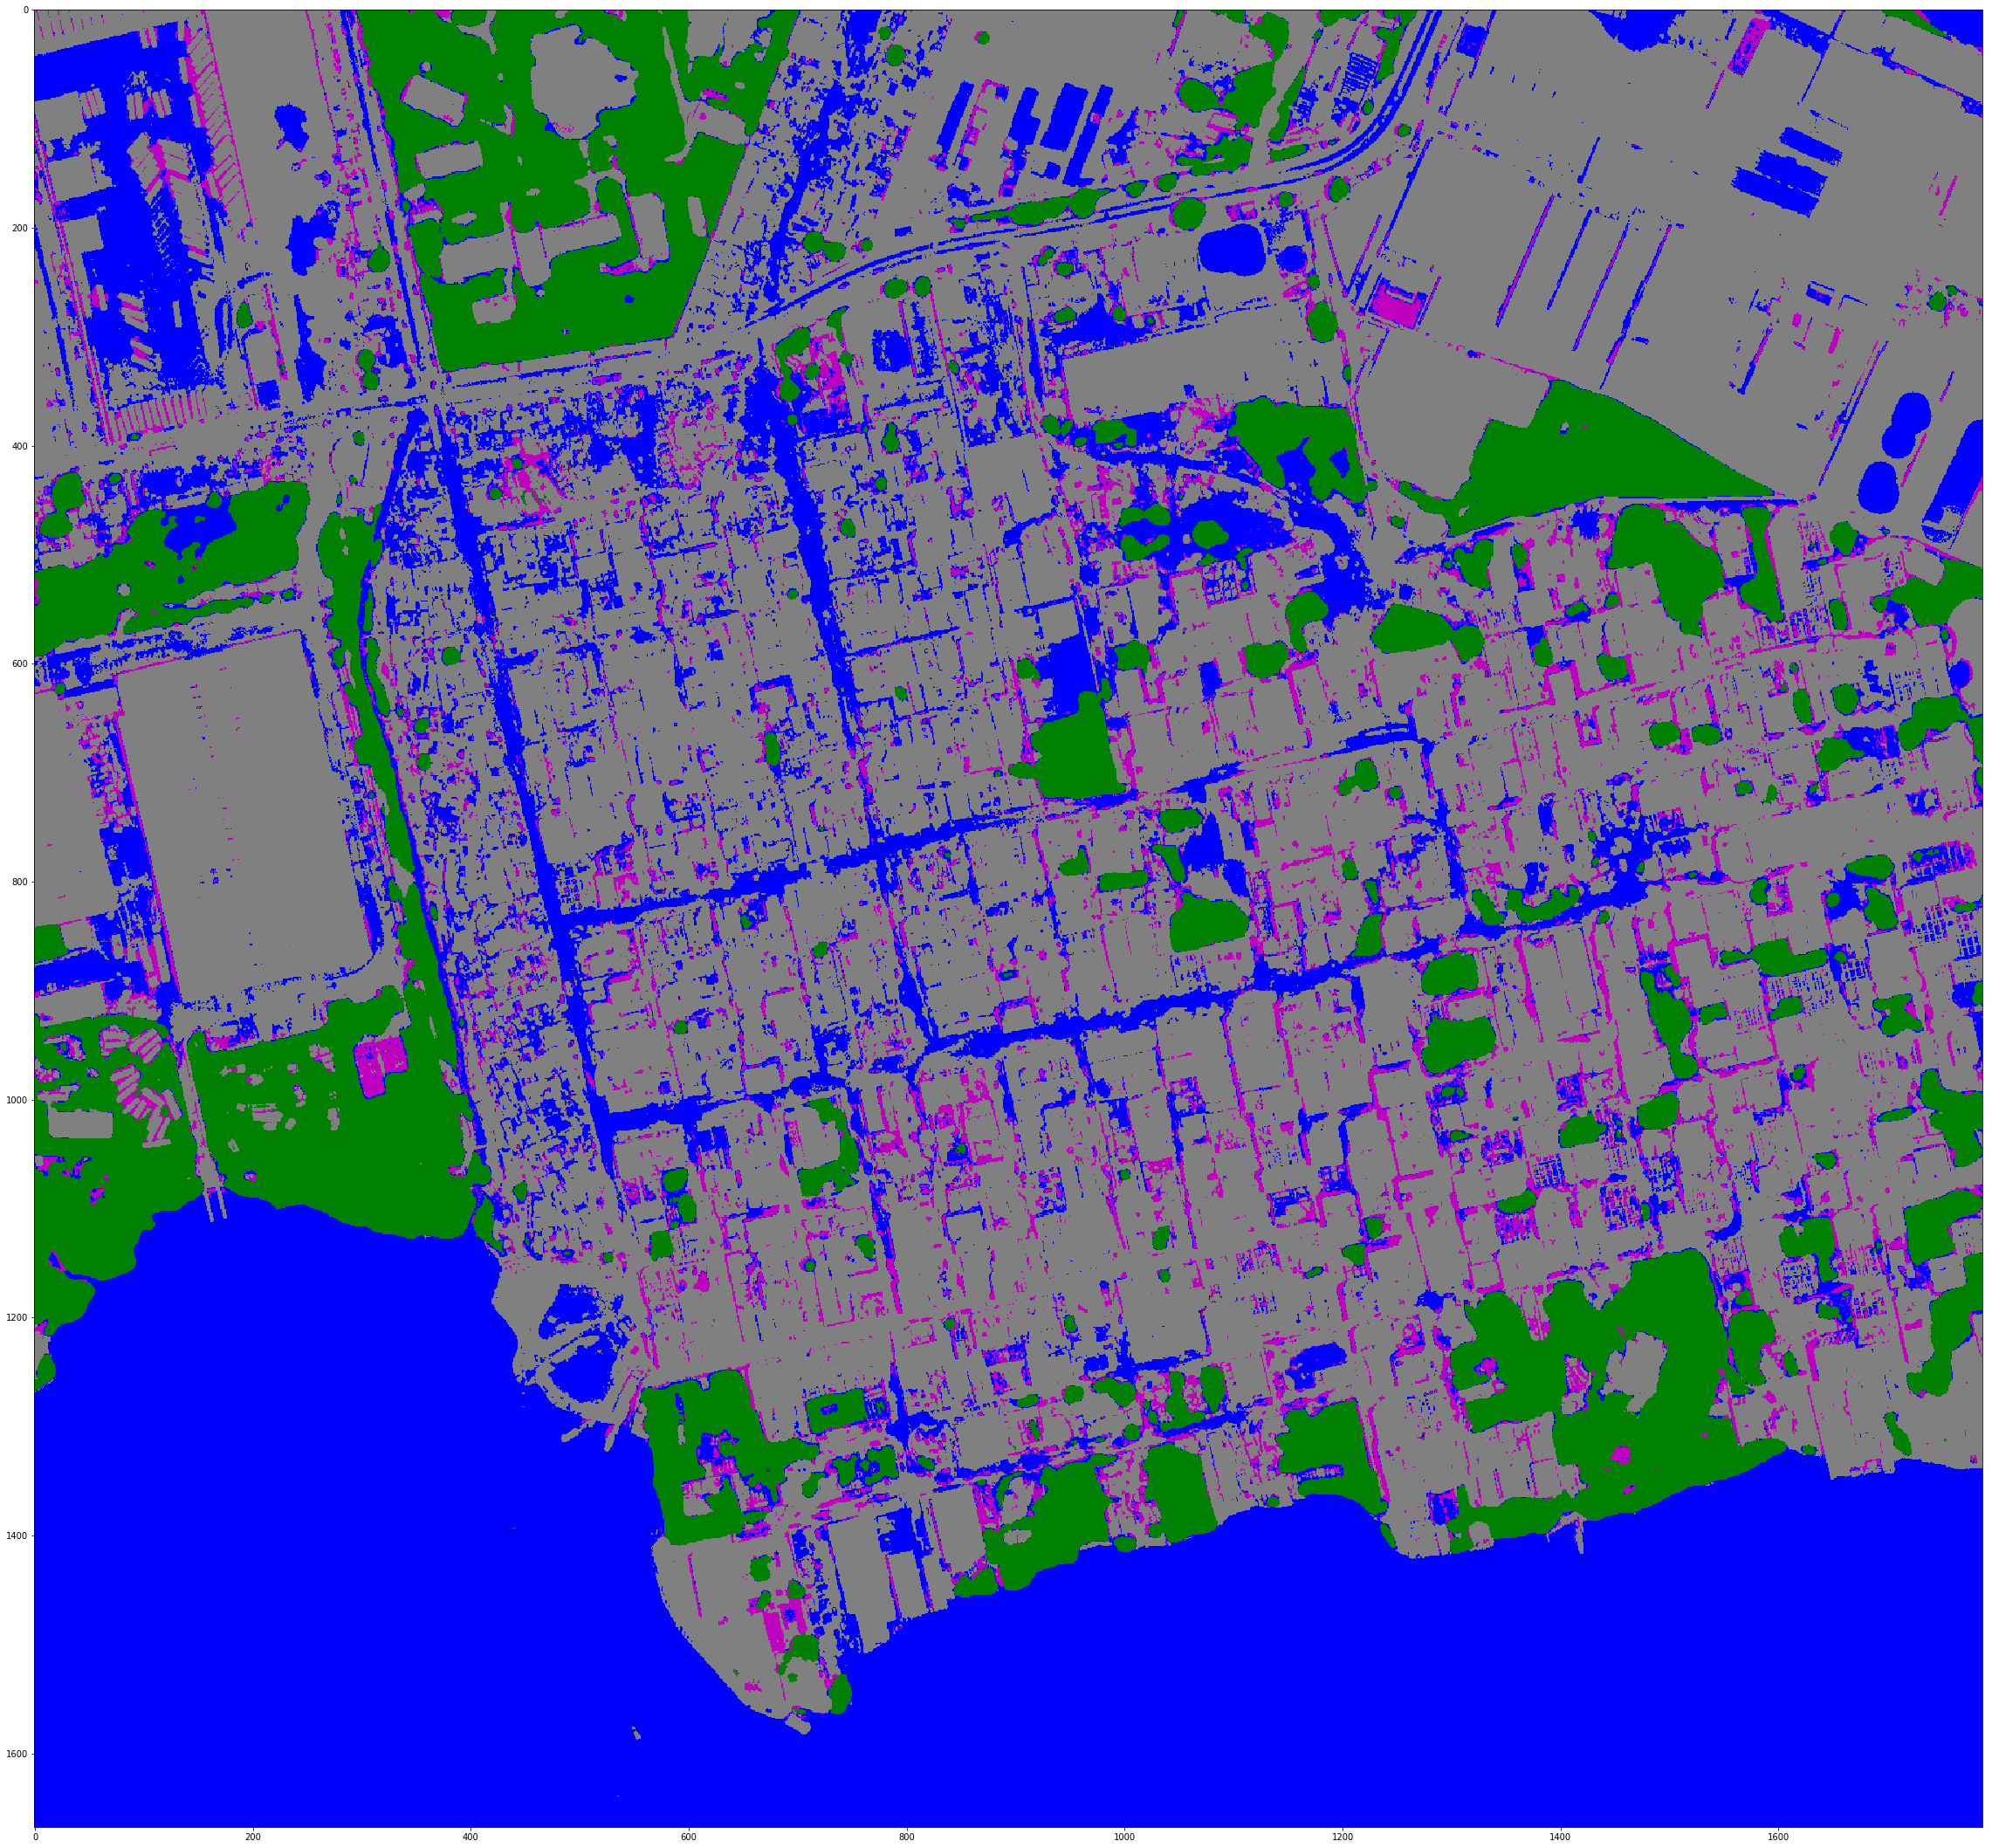

In [134]:
# Create stack of inputs for entire image and apply saved linear SVM classifer
index_stack, meta = es.stack(raw_list)
index_im = np.rollaxis(index_stack, 0, 3)
X_index = index_im.reshape(-1,8) #Update based on number of model params
predictedClass = southeast_svm_clf.predict(X_index)

# Plot SVM map
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(figsize = (40,40))
pred_data = predictedClass.reshape(index_im.shape[:2])
cmap = ListedColormap(['m','blue','green','grey'])
ax.imshow(pred_data,cmap=cmap)
plt.show()